Basic manipulation of Meshes, FE variables, and swarms
============


Load python functions needed for underworld.

In [1]:
%matplotlib inline

import underworld as uw
import math
from underworld import function as fn
import glucifer.pylab as plt
import numpy as np

Set simulation parameters. Number of spatial dimensions and the resolution.

In [2]:
dim = 2
res = 4

Mesh objects
------

Finite element (FE) variables need to be assigned on a mesh. The mesh itself consists of a set of spatial coordinates in a grid pattern with the number of divisions set by the user (*res*). The structure of the submesh depends on the element type used when setting it up. In the example below the type 'Q1/dQ0' is used so the submesh (labeled constantMesh) consists of the middle points in each cell. 

In [3]:
elementMesh = uw.mesh.FeMesh_Cartesian( elementType=("Q1/dQ0"), 
                                         elementRes=(res,res), 
                                           minCoord=(0.,0.), 
                                           maxCoord=(1.,1.))

linearMesh   = elementMesh
constantMesh = elementMesh.subMesh 

In [4]:
print ' Number of mesh points (Total) = ',len(elementMesh.data)
print 'Number of mesh points (linear) = ',len(linearMesh.data)
print '      Number of submesh points = ',len(constantMesh.data)

 Number of mesh points (Total) =  25
Number of mesh points (linear) =  25
      Number of submesh points =  16


Plot meshes
----

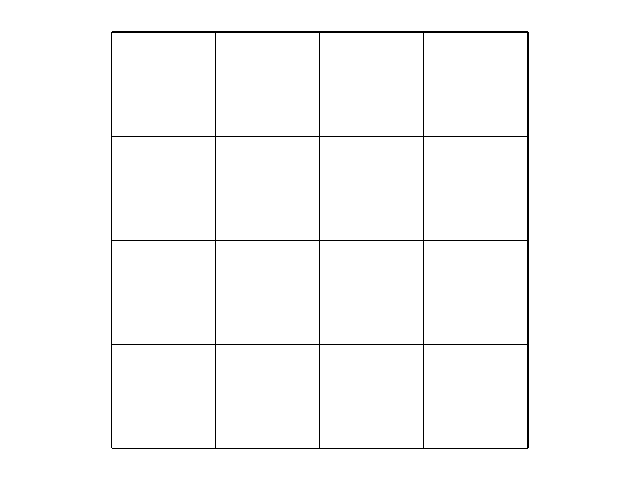

In [5]:
figMesh = plt.Figure()
figMesh.Mesh(linearMesh, colourBar=False)
figMesh.show()

Setting up a random swarm
----------


In [6]:
# initialise a swarm
gSwarm = uw.swarm.Swarm( feMesh=elementMesh )
# create a layout object that will populate the swarm across the whole domain
gLayout = uw.swarm.layouts.GlobalSpaceFillerLayout( swarm=gSwarm, particlesPerCell=20 )
# activate the layout object
gSwarm.populate_using_layout( layout=gLayout )


Plot resulting swarm of random particles

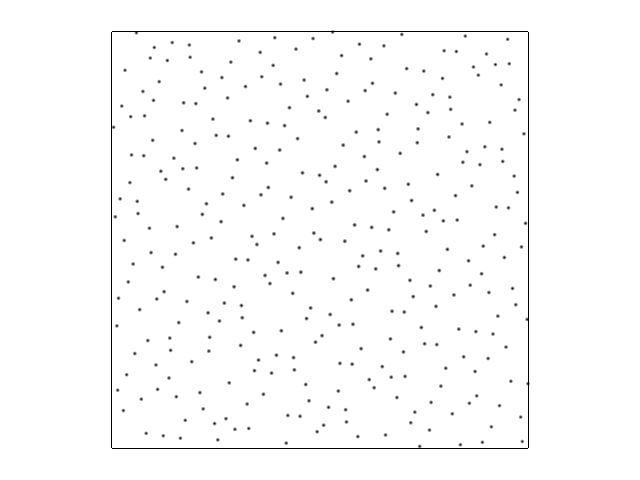

In [7]:
fig1 = plt.Figure()
fig1.Points( swarm=gSwarm, pointSize=5, colourBar = False)
fig1.show()

Customising a swarm
---------

We can use the swarm particle method, with the above plotting method, to visualise the mesh nodes. To this end a swarm is created and the particle coordinates are set to be the coordinates used for each node point on the mesh.

First lets look at what the data for the first 5 points looks like for the mesh.

In [8]:
print elementMesh.data[0:5]

[[ 0.    0.  ]
 [ 0.25  0.  ]
 [ 0.5   0.  ]
 [ 0.75  0.  ]
 [ 1.    0.  ]]


Since these 5 entries are the x, z (in 2D) coordinates for each mesh point, then they can be used directly to set the positions for the swarm particles

In [9]:
# setup a new swarm. At this point there is no data in the swarm
SwarmForElementMesh = uw.swarm.Swarm( feMesh=elementMesh )
# setup an array containing the position data from the elementMesh data
SwarmCoords = elementMesh.data
# use this array to add particles to the newly created swarm
SwarmForElementMesh.add_particles_with_coordinates(SwarmCoords)

# setup a new swarm
SwarmForConstantMesh = uw.swarm.Swarm( feMesh=elementMesh ) # note this must be the whole mesh; elementMesh
# setup an array containing the position data from the constantMesh data
SwarmCoords = constantMesh.data
# use this array to add particles to the newly created swarm
SwarmForConstantMesh.add_particles_with_coordinates(SwarmCoords)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15], dtype=int32)

The final output from this will be a linear array with the same number of entries as there are nodes in the constantMesh (shown above).

Plot meshes
--------

Now we can plot these two swarms to see the ElementMesh (more mesh points) and the ConstantMesh (defined as the submesh).

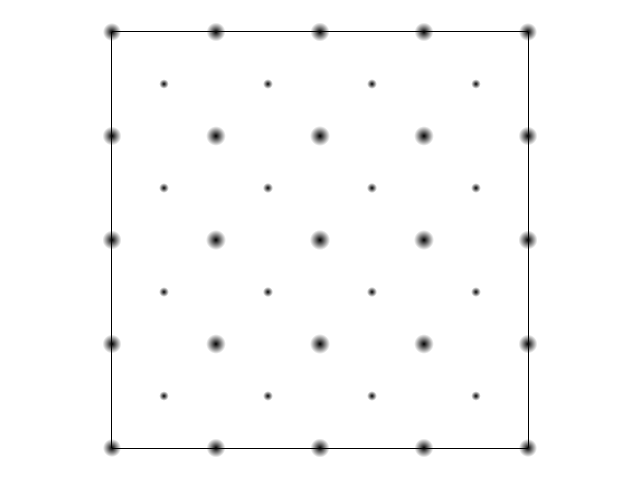

In [10]:
fig1 = plt.Figure()
fig1.Points( swarm=SwarmForElementMesh, pointSize=20, colour='blue', colourBar = False)
fig1.Points( swarm=SwarmForConstantMesh, pointSize=10, colour='red', colourBar = False)
fig1.show()

Editing swarms directly
====

Create a new swarm using the mesh as particle coordinates, as above.

In [11]:
# initialise a swarm
SwarmCustom = uw.swarm.Swarm( feMesh=elementMesh )
# setup an array containing the position data from the elementMesh data
SwarmCoords = elementMesh.data
# use this array to add particles to the newly created swarm
SwarmCustom.add_particles_with_coordinates(SwarmCoords)



array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24], dtype=int32)

Examine the position data stored inside the swarm objects.

In [12]:
print 'Head of swarm positions'
print SwarmCustom.particleCoordinates.data[0:5]
print 'Tail of swarm positions'
print SwarmCustom.particleCoordinates.data[-5:]
imid = len(SwarmCustom.particleCoordinates.data)/2
print 'Mid-way particle',imid
xcoord = SwarmCustom.particleCoordinates.data[imid][0]
ycoord = SwarmCustom.particleCoordinates.data[imid][1]
print 'x = ',xcoord,'  ; y = ',ycoord

Head of swarm positions
[[ 0.    0.  ]
 [ 0.25  0.  ]
 [ 0.5   0.  ]
 [ 0.75  0.  ]
 [ 1.    0.  ]]
Tail of swarm positions
[[ 0.    1.  ]
 [ 0.25  1.  ]
 [ 0.5   1.  ]
 [ 0.75  1.  ]
 [ 1.    1.  ]]
Mid-way particle 12
x =  0.5   ; y =  0.5


Plot current positions for swarm particles
----

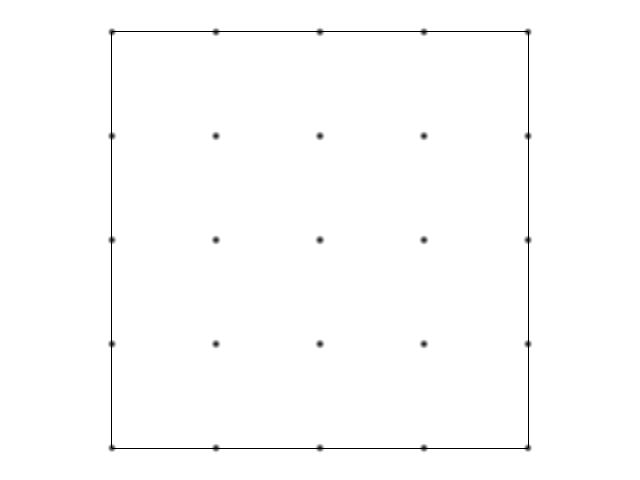

In [13]:
fig1 = plt.Figure()
fig1.Points( swarm=SwarmCustom, pointSize=10, colour='blue', colourBar = False)
fig1.show()

Shift a single particle
----

If we want to move a single particle, say the one to the right of the bottom left corner. The particles are numbered from bottom left to top right (increasing with increasing x and z). So the bottom left corner is particle index 0, and the one to the right of this is particle index 1.

In [14]:
SwarmCustom.particleCoordinates.data[1][1]=SwarmCustom.particleCoordinates.data[1][1]+0.1


Replot with shifted particle
----

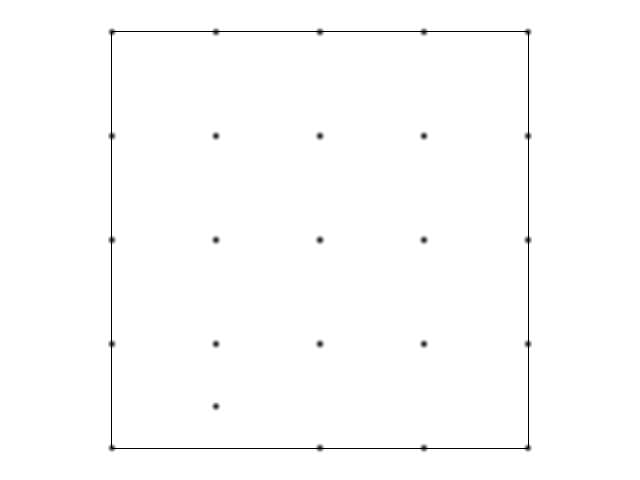

In [15]:
fig1 = plt.Figure()
fig1.Points( swarm=SwarmCustom, pointSize=10, colour='blue', colourBar = False)
fig1.show()

Caution
-----

Making a copy of a swarm and manipulating it will change the original. Also using *copy.copy* in python will not copy the swarm object correctly.

So the following cell will have the effect of undoing moving particle 1 in the original swarm, even though it looks like we are changing a new swarm.

In [16]:
SwarmCustomMod = SwarmCustom

SwarmCustomMod.particleCoordinates.data[1][1]=SwarmCustomMod.particleCoordinates.data[1][1]-0.1


Replot the original editted swarm
-----

Note that the particle has moved back to it's position even though SwarmCustom was not modified directly.

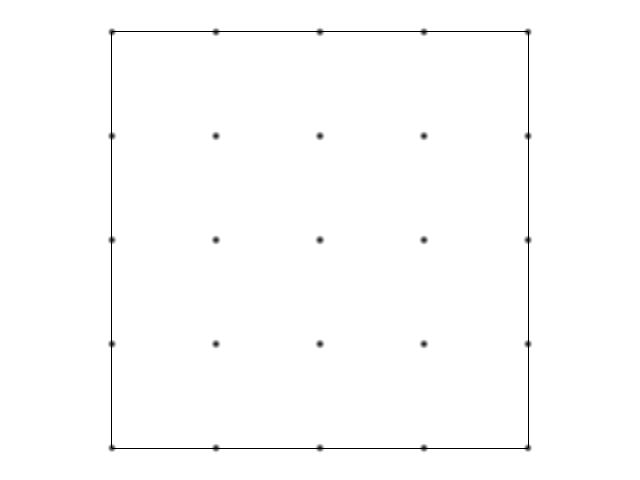

In [17]:
fig1 = plt.Figure()
fig1.Points( swarm=SwarmCustom, pointSize=10, colour='blue', colourBar = False)
fig1.show()

Finite element (FE) variables
======

We'll set up a few of these as examples and then manipulate them using their data attributes.

Create FE variables on the meshes

In [18]:
velocityField    = uw.fevariable.FeVariable( feMesh=linearMesh,   nodeDofCount=dim )
pressureField    = uw.fevariable.FeVariable( feMesh=constantMesh, nodeDofCount=1 )
temperatureField = uw.fevariable.FeVariable( feMesh=linearMesh,   nodeDofCount=1 )

Set FE variables to zero

In [19]:
velocityField.data[:] = [0.,0.]
pressureField.data[:] = 0.
temperatureField.data[:] = 0.

Edit FE variables by hand
---------

Often will want to base the values of a FE variable on its spatial location, for example the temperature as a function of depth in the z direction.

Write a function for the temperature given depth (z)

In [20]:
def TempDepthFunc(z):
    return z

Get the x and z coordinates and use to set temperature data

In [21]:
for index, coord in enumerate(linearMesh.data):
    x = coord[0]
    z = coord[1]
    temperatureField.data[index] = TempDepthFunc(z)

Use maths functions that are built into underworld for cos and sin to define a velocity vector field

In [22]:
coordmid = (0.5, 0.5)
for index, coord in enumerate(linearMesh.data):
    x = coord[0]
    z = coord[1]
    xpi = x*(math.pi)
    zpi = z*(math.pi)
    mag = math.sin(xpi)*math.sin(zpi)
    xx = x-coordmid[0]
    zz = z-coordmid[1]
    vx = -zz*mag
    vy = xx*mag
    velocityField.data[index] = (vx, vy)

Plot constructed temperature and velocity fields
----

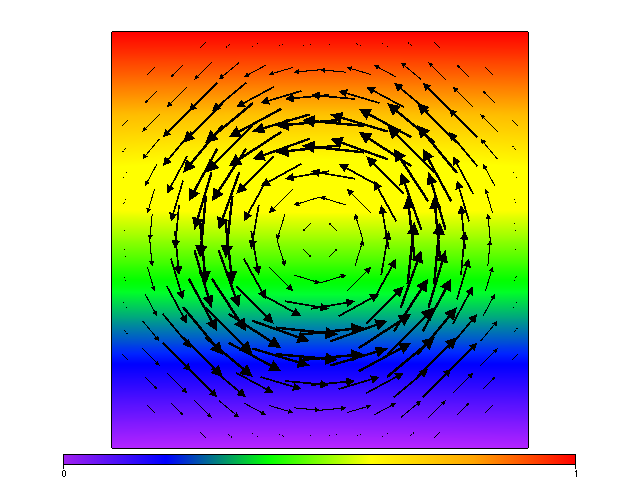

In [23]:
figVT = plt.Figure()
figVT.Surface(temperatureField, linearMesh)
figVT.VectorArrows(velocityField, linearMesh, lengthScale=1., arrowHeadSize=0.2 )
figVT.show()

Setting swarm properties based on FE variable values
---------

Mark particles based on the temperature at their spatial coordinates. Firstly, create a new variable (an integer in this case) attached to the swarm object.

In [24]:
SwarmVariable = SwarmCustom.add_variable( dataType="int", count=1 )

Set the newly created variable to integer values based on the temperature at each index. Since the swarm particles directly line up with the mesh for the temperature FE variable then a direct copy is possible.

In [25]:
SwarmVariable.data[:] = temperatureField.data[:]*10.
print SwarmVariable.data[0:10]

[[0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]]


Plot swarm particles using new variable as the colour
----

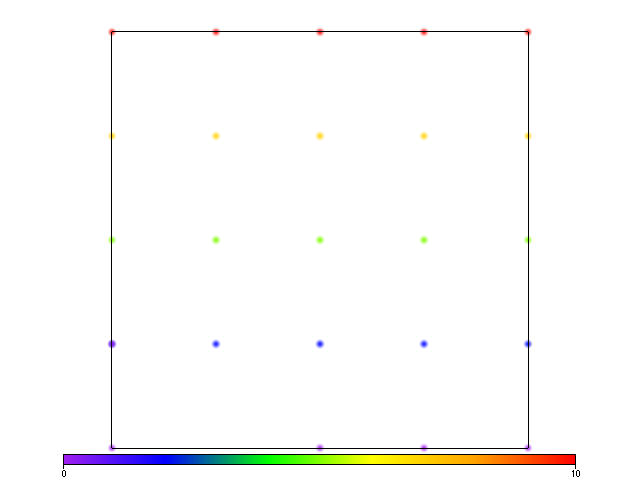

In [26]:
fig2 = plt.Figure()
fig2.Points( swarm=SwarmCustom, pointSize=10, colourVariable=SwarmVariable, colourBar = True)
fig2.show()

For more information on using variables assigned to swarm objects see **RayleighTaylorBenchmark.ipynb**